# ITCS 4156 - Programming Assignment 3 -  Neural Networks

<font color="blue"> Jaren Robbins </font>

# Imports

In [1]:
import inspect
import math
from typing import Tuple, List, Union
from pdb import set_trace

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline  
%load_ext autoreload
%autoreload 2

## Instructions

In this programming assignment you will be implementing and training **two** neural networks. Each neural network will be trained on a different set of data. You will utilize the Boston House Pricing regression dataset and MNIST handwritten digit classification dataset. To account for the different ML problems and datasets you will need to implement the following neural networks:

1. **Regressor neural network** which predicts the median value of owner-occupied homes in $1000's
2. **Classifier neural network** for multi-class classification that predicts the digits 0-9 

This mini-project will work similarly to the labs where there are TODOs you must complete. Be on the lookout for **TODO** tags - they guide you towards what needs to be done. However, unlike the labs, most of the coding will now be left to you and there will be less direct instructions. The goal of this mini-project is for you to practice what your learned in the labs on your own! There are two types of TODOs:

1. **TODO**: This is a TODO that will be manually graded by the TA.
2. **AutoLab TODO**: This is a TODO that will be automatically graded using Autolab.

Lastly, throughout the mini-project files the `# TODO` tags will help guide you towards what and where to implement code. Any tags marked as `# TODO (REQUIRED)` will be required while any tags marked as `# TODO (OPTIONAL)` can be optional depending on the context.


### Step 1: Reviewing data, visualizations, and utility functions.


The first step for the regression and classification problems will be to load, visualize, and review data cleaning and transformation process. Furthermore, take time to review the utility functions, plots, and metrics functions for each problem so you know how to use them (most of these functions we have seen in prior labs).

### Step 2: Writing algorithms, setting hyper-parameters, and defining data cleaning/transformations

#### Defining the algorithms

You will need to implement two neural networks and one base neural network class. Here the `NeuralNetworkRegressor` and `NeuralNetworkClassifier` classes will implement the base `NeuralNetwork` class. Thus, you will need to write your code in the `NeuralNetwork.py`, `NeuralNetworkRegressor.py`, and `NeuralNetworkClassifier.py` files which are found in the `itcs4156/assigments/neural_networks` directory. 

To test your implementations, you will perform the training and validation within this notebook. Additionally, you will provide visualization of your results. In order to find the best hyper-parameters there is an **optional** section where you can perform K-cross validation (i.e., a grid search) using Sklearn.

By default, this entire notebook will run and produce a score of around ~32 points. If you are struggling submitting working code (i.e., no errors are thrown during `run_eval()`) will at least give you some baseline points towards the mini-project.


#### Defining hyper-parameters and data preprocessing

You will need to add code for setting hyper-parameters and data cleaning/transformations in the  `itcs4156/assigments/neural_networks/train.py` file. Within the `train.py` is the class `HyperParametersAndTransforms`. Within the `HyperParametersAndTransforms` class are sub-classes that correspond to each algorithm: `NeuralNetworkRegressor` and `NeuralNetworkClassifier`. These sub-classes are where you will set your hyper-parameters and data clean/transformations for EACH algorithm.

Within the `train.py` script the `# TODO` comments will help point you towards which hyper-parameters and data cleaning/transformation need to set. Any variable or function that is required to be set will be marked with the following tag: `# (REQUIRED) TODO`. If a TODO comment is marked as `# (OPTIONAL) TODO`, setting the hyper-parameter is optional and can be left alone unless you truly want to change it.

### Step 3: Local score estimation

Before submitting to Autolab, you will need to run the evaluation code using the `run_eval()` function located at the bottom of the notebook. This is a local test that uses the validation data to estimate the score you might receive on Autolab when using the actual testing data. Since you will have only **5** Autolab submissions be sure to perform well on these local tests before submitting. 

### Step 4: Submit to Autolab

If you are satisfied with the local performance of your models, then you can now submit to Autolab. To do so zip the `neural_networks/` directory inside `itcs4156/assigments/` directory and then submit the `.zip` file to Autolab. 

Once submitted, you must wait for Autolab to grade your code. Depending on the amount of submissions and optimization of your code this can take up to 10 minutes. If your code exceeds the 10 minute wall, Autolab will stop grading your assignment and report a 0 as your grade. If this happens, you will need to figure out why your algorithm is taking too long to run and resubmit. Once again, use the local testing function `run_eval()` to debug your code as this is the same function that is called by Autolab (however Autolab uses a hidden test set instead of the validation set)! 

Below is a visualization of which folder to zip and submit to Autolab.

```
| - itcs4156
    | - assignments
        | - neural_networks   <----------- Zip folder and submit to Autolab
            | - train.py
            | - NeuralNetwork.py
            | - NeuralNetworkRegressor.py
            | - NeuralNetworkClassifier.py
            | - evaluate.py
            | - __init__.py
    | - notebooks
        | - 3-neural-networks.ipynb
```


### Step 5: Submit to Canvas

Finally, you'll need to submit this notebook to Canvas. 

Below is a visualization of which notebook to submit to Canvas.
```
| - itcs4156
    | - assignments
        | - neural_networks
            | - train.py
            | - NeuralNetwork.py
            | - NeuralNetworkRegressor.py
            | - NeuralNetworkClassifier.py
            | - evaluate.py
            | - __init__.py
    | - notebooks
        | - 3-neural-networks.ipynb <----- Upload this file on Canvas
```


## Additional Notes

- You are free to create your own class variables in  any class's `__init__()` method. If you want to pass class variables as hyper-parameters, instead of hard coding them, then also define them in the corresponding sub-class within the `HyperParametersAndTransforms` class.

- You are free to define your own classes, methods, or functions within each class or file EXCEPT in the `evaluate.py` script.

- For analysis, you can use any library you want in the notebook. However, matplolib and seaborn will be unavailable in the evaluation environment so refrain from importing them with the python files.

- Even though scikit-learn is available during evaluation, you should be implementing your own algorithms instead of using the library. This will be reviewed before the final grading. Please feel free to import other python modules contained within the `requirements.txt` file found in the root of the Gitlab repository. These include libraries such as NumPy and Pandas. However, keep in mind the above constraints on importing plotting libraries. 

- **Epochs (number of iterations of data)**: While training your models locally, you can keep this number as high as you want. But please keep in mind, that for evaluation your job will have a maximum of **10 minutes** to finish training and prediction for all the three algorithms. So tune this parameter, keeping this information in mind. 

## Grading 

The final grading will be done using the **TEST** dataset split that you don't have access to. The test set will be used when you submit to **Autolab**. 80 points will come from whether or not you pass MSE checks (scoring system broken down in the next section). Partial credit is assigned based on your MSE value.

You will only get <u>5 submissions to Autolab</u>  for this lab. <u>**Only your final submission will be graded**</u>. Further, when you submit to Autolab you will only have <u>10 minutes (600 seconds) for ALL your algorithms to be trained and tested</u> .

Points | TODO Type | Description
--|----|----:
20 | In notebook TODOs | Visualize and analyze results 
40 | Autolab TODO 1-2 | neural network regressor  
40 | Autolab TODO 3-4 | neural network classifier   

Your Autolab ranking will be computed based on the following:
- total points earned
- regression test MSE
- classification test accuracy 

Students who make it within the top 10 will receive 1 point of extra credit. Below is the breakdown of the scores/points that you can receive for each algorithm. 

### Scoring for neural network regressor 

You can receive a maximum of 40 points for the network regressor algorithm. Below is the `rubric_regression()` function used to compute your score. Feel free to run the function with a given accuracy to see what score you would receive for this algorithm.

In [2]:
from itcs4156.assignments.neural_networks.evaluate import rubric_regression
print(inspect.getsource(rubric_regression))

def rubric_regression(mse, max_score=40):
    thresh = 12.5
    if mse <= thresh:
        score_percent = 100
    elif mse is not None:
        score_percent = (thresh / mse) * 100
        if score_percent < 40:
            score_percent = 40
    else:
        score_percent = 20
    score = max_score * score_percent / 100.0

    return score



In [3]:
fake_mse_score = 15
fake_mse_points = rubric_regression(fake_mse_score)
print(f"Points received {int(round(fake_mse_points))}/40")

Points received 33/40


### Scoring system for neural network classifier 

You can receive a maximum of 40 points for the network classifier algorithm. Below is the `rubric_classification()` function used to compute your score. Feel free to run the function with a given accuracy to see what score you would receive for this algorithm.

In [4]:
from itcs4156.assignments.neural_networks.evaluate import rubric_classification
print(inspect.getsource(rubric_classification))

def rubric_classification(acc, max_score=40):
    score_percent = 0
    if acc >= 0.93:
        score_percent = 100
    elif acc >= 0.85:
        score_percent = 90
    elif acc >= 0.70:
        score_percent = 80
    elif acc >= 0.60:
        score_percent = 70
    elif acc >= 0.50:
        score_percent = 60
    elif acc >= 0.40:
        score_percent = 55
    elif acc >= 0.30:
        score_percent = 50
    elif acc >= 0.20:
        score_percent = 45
    else:
        score_percent = 40
    score = max_score * score_percent / 100.0 
    return score



In [5]:
fake_acc_score = .90
fake_acc_points = rubric_classification(fake_acc_score)
print(f"Points received {int(round(fake_acc_points))}/40")

Points received 36/40


# Setting Hyper-parameters and Sklearn Pipelines
Recall, Step 2 requires that for each algorithm you set hyper-parameters (see Step 2 for more details). Below is the `HyperParametersAndTransforms` class contained within `itcs4156/assignments/neural_networks/train.py` script. 


Here the `HyperParametersAndTransforms` class contains sub-class for the  `NeuralNetworkRegressor`, and `NeuralNetworkClassifier`  algorithms. Each sub-class will have a dictionary called `model_kwargs` and `data_prep_kwargs`. If a sub-class DOES NOT have either one of these it means no hyper-parameters are required! 

Within each one of these sub-class you need to set the hyper-parameters and data cleaning/transformation keys which are marked by the `# TODO` comments. These TODO comments indicate where you need to set the hyper-parameters and where you need to set the feature/target Sklearn `Pipeline` instances. Any tags marked as `# TODO (REQUIRED)` will be required while any tags marked as `# TODO (OPTIONAL)` can be optional depending on the context.

In [6]:
from itcs4156.assignments.neural_networks.train import HyperParametersAndTransforms as hpt
from itcs4156.assignments.neural_networks import train
print(inspect.getsource(train))

import numpy as np
from sklearn.pipeline import Pipeline
from itcs4156.util.metrics import nll, sse
from itcs4156.util.data import AddBias, Standardization, ImageNormalization, OneHotEncoding

def delta_mse(y, y_hat):
    # (REQUIRED) Add code below for the derivative of the mean squared error
    return y_hat - y

def delta_softmax_nll(y, y_hat):
    # (REQUIRED) Add code below for for the combined derivative of the softmax and negative log likelihood loss
    return y_hat - y

class Linear():
    @staticmethod
    def activation(z):
        # (REQUIRED) Add code below for Linear activation function equation
        return z
    
    @staticmethod
    def derivative(z):
        # (REQUIRED) Add code below for Linear activation function derivative
        return np.ones(z.shape)
    
class Sigmoid():
    @staticmethod
    def activation(z):
        # (REQUIRED) Add code below for Sigmoid activation function equation
        return 1 / (1 + np.exp(-z))
    
    @staticmethod
    def der


## Hyper-parameters

### Defining  `model_kwargs`
Recall that step 2 requires defining hyper-parameters for each algorithm. The `model_kwargs` dictionary is where you will define any keyword arguments (kwargs) that will be passed to the corresponding algorithm class.  

For example, `model_kwargs` for the `HyperParametersAndTransforms.NeuralNetworkRegressor` sub-class will be passed to the `NeuralNetworkRegressor` class located in `itcs4156/neural_networks/NeuralNetworkRegressor.py` script . All the kwargs should correspond to the arguments taken in by the `__init__()` method for each class (these will differ for each class).

Below is and example of accessing the `HyperParametersAndTransforms.NeuralNetworkRegressor` sub-class's `model_kwargs` dictionary.




In [7]:
hpt.NeuralNetworkRegressor.model_kwargs

{'neurons_per_layer': [50, 50, 1],
 'learning_curve_loss': <function itcs4156.util.metrics.sse(y, y_hat)>,
 'delta_loss_func': <function itcs4156.assignments.neural_networks.train.delta_mse(y, y_hat)>,
 'g_hidden': itcs4156.assignments.neural_networks.train.Sigmoid,
 'g_output': itcs4156.assignments.neural_networks.train.Linear,
 'alpha': 0.01,
 'epochs': 500,
 'batch_size': 32,
 'verbose': False,
 'seed': None}

## Activation and derivative loss functions

Further, you will notice that the `train.py` script has the following functions and classes:

- Derivative Functions
    - `delta_mse()`: Function for computing the derivative for the mean squared error loss function.
    - `delta_softmax_nll()`: Function for computing the derivative for the softmax and negative log likelihood loss function.
- Activation Functions
    - `Linear`: Class which computes the linear activation and derivative.
    - `Sigmoid`: Class which computes the sigmoid activation and derivative.
    - `Tanh`: Class which computes the tanh activation and derivative.
    - `ReLU`: Class which computes the ReLU activation and derivative.
    - `Softmax`: Class which computes the softmax activation and derivative.


You will need to complete these classes/functions as needed. These classes/functions can be passed to arguments within `NeuralNetworkRegressor` or `NeuralNetworkClassifier` `model_kwargs` dictionary.


Follow the `# TODO` tags to figure out which classes/functions you are required to implement. Note that the derivative functions will need to be passed to the `model_kwargs` argument `delta_loss_func` while the activation functions will need to be passed to the `model_kwargs` arguments `g_hidden` and `g_output`.


### What is the `DataPreparation` class?

So which class do the `data_prep_kwargs` get passed to? Well, from now on, every dataset that we will see utilize its own implementation of the `DataPreparation` class given below. The `DataPreparation` will apply any  preprocessing steps you specify within `data_prep_kwargs`. Notice, that the `DataPreparation` class has the following methods and variables:

- `self.feature_pipe`: Will be passed the Sklearn Pipeline that YOU define within the `feature_pipe` key for the `data_prep_kwargs` dictionary.


- `self.target_pipe`: Will be passed the Sklearn Pipeline that YOU define within the `target_pipe` key for the `data_prep_kwargs` dictionary.


- `fit()`: Method that calls the each pipelines `fit()` method. For example, `self.feature_pipe.fit()` and `self.target_pipe.fit()` are called.


- `transform()`: Method that calls the each pipelines `transform()` method. For example, `self.feature_pipe.transform()` and `self.target_pipe.transform()` are called.


- `fit_transform()`: Method that calls the each pipelines `fit_transform()` method. For example, `self.feature_pipe.fit_transform()` and `self.target_pipe.fit_transform()` are called.


- `data_prep()`: Is an empty method that will be implemented for each dataset that inherits from `DataPreparation`. In general, this method will be implemented to run any data preprocessing by calling the `fit_transform()` method on the training data and the `transform()` method on the validation data. This method will also contain any additional splitting or preprocessing that is required for a given dataset. You should notice that this method will act very similar to the `data_prep()` function we often define in the labs!


Each dataset and algorithm can have their own implementation of the `DataPrepartion` class, as we will soon see.

In [8]:
from itcs4156.datasets.DataPreparation import DataPreparation
print(inspect.getsource(DataPreparation))

class DataPreparation():
    def __init__(self, target_pipe, feature_pipe):
        self.target_pipe = target_pipe
        self.feature_pipe = feature_pipe
        
    @abstractmethod
    def data_prep():
        pass
    
    def fit(self, X, y=None):
        if self.target_pipe  is not None:
            self.target_pipe.fit(y)
            
        if self.feature_pipe is not None:
            self.feature_pipe.fit(X)

    def transform(self, X, y=None):
        if self.target_pipe is not None:
            y = self.target_pipe.transform(y)
            
        if self.feature_pipe is not None:
            X = self.feature_pipe.transform(X)

        return X, y
    
    def fit_transform(self, X, y):
        self.fit(X, y)
        X, y = self.transform(X, y)
        return X, y



### What is the `HousingDataPreparation` class?
The `HousingDataPreparation` class is the implementation of `DataPreparation` made specifically for the Boston House Price regression dataset. This class will load, apply YOUR cleaning and transformation, and apply any additional preprocessing steps. Notice that this class implements the `data_prep()` method that was left empty by its parent, the `DataPreparation` class.

- `data_prep()`: Loads the Boston House Price data applies any data cleaning or transformations that you specified with `data_prep_kwargs`. It also applies additional preprocessing steps such as binarizing the data and converting the data types to NumPy arrays. Note the following kwargs can be passed:

    - `return_array`: Returns all data as NumPy arrays instead of Pandas DataFrames.

In [9]:
from itcs4156.datasets.DataPreparation import HousingDataPreparation
print(inspect.getsource(HousingDataPreparation))

class HousingDataPreparation(DataPreparation):
    def __init__(self, target_pipe, feature_pipe, use_features):
        super().__init__(target_pipe, feature_pipe)
        self.use_features = use_features
        
    def data_prep(self, return_array=False):
        
        if self.target_pipe is not None:
            warnings.warn("Target pipeline is not needed for the Boston House Price dataset. " \
                          "Even though you passed a Pipeline for `target_pipe`, " \
                          "`target_pipe` will be set to None.")
            self.target_pipe = None
        
        if return_array: 
            print("Returning data as NumPy array...")
            return_df = False
        
        print(f"Attempting to use the following features: {self.use_features}")
        housing_dataset = HousingDataset()
        house_df_trn, house_df_vld = housing_dataset.load()
        
        X_trn_df, y_trn_df, X_vld_df, y_vld_df = split_data(
            df_trn=house_df_t

### What is the `MNISTDataPreparation` class?
The `MNISTDataPreparation` class is the implementation of `DataPreparation` made specifically for the MNIST dataset. This class will load, apply YOUR cleaning and transformation, and apply any additional preprocessing steps. Notice that this class implements the `data_prep()` method that was left empty by its parent, the `DataPreparation` class.

- `data_prep()`: Loads the MNIST data applies any data cleaning or transformations that you specified with `data_prep_kwargs`. It also applies additional preprocessing steps such as binarizing the data and converting the data types to NumPy arrays. Note the following kwargs can be passed:

    - `binarize`: Constrains the MNIST problem into a binary problem where the only available images are for 0s and 1s. Thus, the goal is to classify 0s vs 1s.

    - `return_array`: Returns all data as NumPy arrays instead of Pandas DataFrames.

In [10]:
from itcs4156.datasets.DataPreparation import MNISTDataPreparation
print(inspect.getsource(MNISTDataPreparation))

class MNISTDataPreparation(DataPreparation):
    def __init__(self, target_pipe, feature_pipe):
        super().__init__(target_pipe, feature_pipe)
        
    def data_prep(self, binarize=False, return_array=False):
        mnist_dataset = MNISTDataset()
        X_trn_df, y_trn_df, X_vld_df, y_vld_df = mnist_dataset.load()
        
        # Converts MNIST problem to classifying ONLY 1s vs 0s
        if binarize:
            X_trn_df, y_trn_df = binarize_classes(
                X_trn_df, 
                y_trn_df, 
                pos_class=[1],
                neg_class=[0], 
            )
            
            X_vld_df, y_vld_df = binarize_classes(
                X_vld_df, 
                y_vld_df, 
                pos_class=[1], 
                neg_class=[0], 
            )

        X_trn_df, y_trn_df = self.fit_transform(X=X_trn_df, y=y_trn_df)
        X_vld_df, y_vld_df = self.transform(X=X_vld_df, y=y_vld_df)

        if return_array:
            print("Returning data as

# Neural Network Regression

In this section you will implement the regressor neural network. 

## Boston House Price Prediction
![](https://assets.prevu.com/blogs/images/first-time-buyer-boston-real-estate/03d0c13cdf6721a022afd91e343493b5?ixlib=rb-4.0.3&w=670&lossless=true&auto=format%20compress&fit=fill&fill=solid&s=cb885d7fc811865d8d2219c47c87eb01)

The dataset you'll be using for this project is, once again, the Boston Housing dataset which contains various different features about houses in Boston. This is a classic machine learning dataset from 1978 and is one of the first datasets most people use when first learning machine learning. There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of the house, given by the 'MEDV' column, using the provided features.

The dataset consists of 3 splits:

1. **Train**: Throughout this assignment you will be training your model using this data.
2. **Validation**: You will then use this set to tune your model and evaluate its performance.
3. **Test**: This split simulates real life data which we often don't have access to until the model is deployed. We have kept this split hidden from you and we will use it to judge the performance of your model on Autolab.


### Downloading the data

First, let's download the training and validation splits. To do so, we'll need the `HousingDataset` class from our module which is located in the `itcs4156/datasets/HousingDatase.py` file.

The below code loads the data by instantiating the `HousingDataset` class. If you already have the data downloaded then the download will be skipped.

In [11]:
from itcs4156.datasets.HousingDataset import HousingDataset
housing_dataset = HousingDataset()

Skipping download. File already exists: /Users/jarenrobbins/Documents/UNCC/Spring-2022/ITCS-4156/Mini-projects/mini-projects/itcs4156/datasets/data/housing.train

Skipping download. File already exists: /Users/jarenrobbins/Documents/UNCC/Spring-2022/ITCS-4156/Mini-projects/mini-projects/itcs4156/datasets/data/housing.val

Skipping download. File already exists: /Users/jarenrobbins/Documents/UNCC/Spring-2022/ITCS-4156/Mini-projects/mini-projects/itcs4156/datasets/data/housing.names



Let's access the 'names' subkey in the 'paths' key. This is a file that contains all the meta information about the features and target in the Boston House Price dataset. Take a second to read through the description of each feature. Recall our target will be  'MEDV' as this column stores the value of a house where each house is a data sample.

In [12]:
with open(housing_dataset.data["paths"]["names"], 'r') as rf:
    print(rf.read())

1. Title: Housing Data

2. Concerns housing values in suburbs of Boston.

3. Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

4. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B     

Below we load the train and validation dataset using the `load()` method. Notice, the features and targets are contained in the **same** DataFrame.

In [13]:
house_df_trn, house_df_vld = housing_dataset.load()

In [14]:
house_df_trn.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01360,75.0,4.00,0,0.410,5.888,47.6,7.3197,3,469.0,21.1,396.90,14.80,18.9
1,0.77299,0.0,8.14,0,0.538,6.495,94.4,4.4547,4,307.0,21.0,387.94,12.80,18.4
2,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666.0,20.2,2.52,23.29,13.4
3,0.20608,22.0,5.86,0,0.431,5.593,76.5,7.9549,7,330.0,19.1,372.49,12.50,17.6
4,0.10084,0.0,10.01,0,0.547,6.715,81.6,2.6775,6,432.0,17.8,395.59,10.16,22.8


In [15]:
house_df_vld.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.08014,0.0,5.96,0,0.499,5.850,41.5,3.9342,5,279.0,19.2,396.90,8.77,21.0
1,0.13117,0.0,8.56,0,0.520,6.127,85.2,2.1224,5,384.0,20.9,387.69,14.09,20.4
2,0.34006,0.0,21.89,0,0.624,6.458,98.9,2.1185,4,437.0,21.2,395.04,12.60,19.2
3,6.44405,0.0,18.10,0,0.584,6.425,74.8,2.2004,24,666.0,20.2,97.95,12.03,16.1
4,41.52920,0.0,18.10,0,0.693,5.531,85.4,1.6074,24,666.0,20.2,329.46,27.38,8.5


## Data Visualization

Below is the classic visualize using Pandas `scatter_matrix()` function that shows the relationship between every feature and our target 'MDEV'. Here we can observe if there are any non-linear relations we might be able to exploit. Also, note the following:
- The last row plots each feature against the target variable "MEDV".
- The diagonal represents the distribution of values for the current feature. 
- The rest of the plot helps us understand any correlation between different features.

In [16]:
from pandas.plotting import scatter_matrix

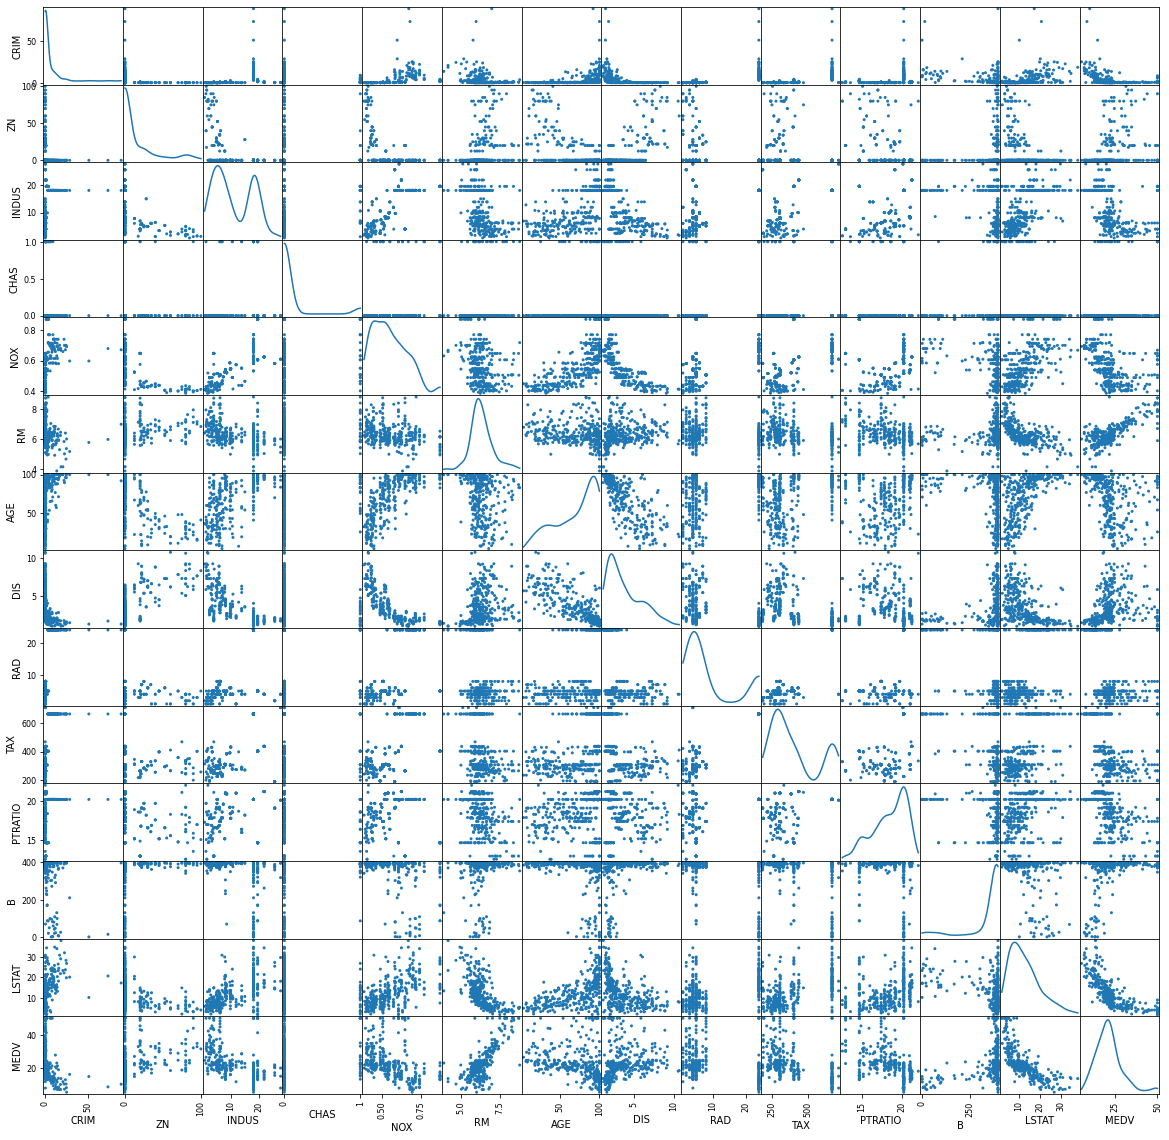

In [17]:
scatter_matrix(house_df_trn, alpha=1, grid=True, figsize=(20,20), diagonal='kde');

## Utility Functions, Plots, and Metrics

This section defines helper functions to visualize and evaluate our performance. Feel free to read through them.

Below we import the `performance_measures()` function which will compute and return some of the different error equations such as SSE, MSE, and RMSE! Additionally, we printed the source code for you so you can see how the function works.

In [18]:
from itcs4156.util.metrics import performance_measures

print(inspect.getsource(performance_measures))

def performance_measures(y: np.ndarray, y_hat: np.ndarray) -> Tuple[np.ndarray]:
    sse_ = sse(y=y, y_hat=y_hat)
    mse_ = mse(y=y, y_hat=y_hat)
    rmse_ = rmse(y=y, y_hat=y_hat)
    return sse_, mse_, rmse_



Below is the import for the `analyze()` function which reports the sum of squared (SSE), mean squared error (MSE), root mean squared error (RMSE) and creates two plots that plot predictions against targets.  

Recall, these two plots are used for visualizing the regression results.  The left most plot, plots the targets and predictions on top of each other while the right most plot, plots the targets against the predictions where the targets are on the y-axis and predictions are on the x-axis

In [19]:
from itcs4156.util.metrics import performance_measures

def analyze(
    y: np.ndarray, 
    y_hat: np.ndarray, 
    title: str, 
    dataset: str,
    xlabel: str = None,
    ylabel: str = None) -> Tuple[np.ndarray, float, float, float]:
    sse_, mse_, rmse_ = performance_measures(y=y, y_hat=y_hat)
    
    # plotting
    fig, axs = plt.subplots(1, 2, figsize=(15,7))
    fig.suptitle(title, fontsize=15)
    axs[0].plot(y, 'ob')
    axs[0].plot(y_hat, 'xr')
    axs[0].set_xlabel(xlabel)
    axs[0].set_ylabel(ylabel)

    
    y1 = min(y)
    y2 = max(y)
    line = np.arange(y1,y2)
    axs[1].scatter(y, y_hat, label="True vs Predicted", color='b', marker='*')
    axs[1].set_xlabel("Targets")
    axs[1].set_ylabel("Predictions")
    axs[1].plot(line, line, label = "Line of Zero Error", color='r')
    plt.legend()
    plt.show()
    
    print(f"{dataset} SSE: {sse_}")
    print(f"{dataset} MSE: {mse_}")
    print(f"{dataset} RMSE: {rmse_}")
    
    return sse_, mse_, rmse_

Below is the `format_results()` function for formatting `GridSearchCV` results. This will also be used in the Neural Network Classification section!

In [20]:
from itcs4156.util.metrics import format_results
print(inspect.getsource(format_results))

def format_results(search_results):
    def get_name(obj):
        try:
            if hasattr(obj, '__name__'):
                return obj.__name__
            elif hasattr(obj, '_name'):
                return obj._name
            elif hasattr(obj, 'name'):
                return obj.name
            else:
                return obj
        except Exception as e:
            return obj

    def find_name(objs):
        if isinstance(objs, (tuple, list)):
            obj_names = []
            for obj in objs:
                name = get_name(obj)
                obj_names.append(name)
            return obj_names
        else:
            return get_name(objs)
       
    df = pd.DataFrame(search_results)
    # Remove train related scores
    df.drop(list(df.filter(regex='train')), axis=1, inplace=True)
    # Sort results performance rank
    df.sort_values('rank_test_score', axis=0, inplace=True)
    df.reset_index(inplace=True, drop=True)
    # Convert object references to readable

## Data Preparation

Before implementing and training the `NeuralNetworkRegressor` class we first need to define the data preprocessing steps. This section will utilize the `HousingDataPreparation` class which inherits from the `DataPreparation` class. 

The `HousingDataPreparation.data_prep()` method  will preprocess the Boston House Price dataset by calling your `target_pipe` and `feature_pipe` Sklearn `Pipeline` instances while also performing some other preprocessing steps such as feature-target splitting.

#### Autolab TODO 1

Within the `HyperParametersAndTransforms.NeuralNetworkRegressor` class, set the `feature_pipe` and `target_pipe` keys to store instances of Sklearn's `Pipeline`. You have access to the following data cleaning/transformation classes which are imported for you within the `train.py` file: 

- `AddBias` 
- `Standardization`
- `ImageNormalization`
- `OneHotEncoding`

Choose the classes YOU think need to be applied in order to prepare the Boston House Price data for the neural network regression algorithm. If needed, feel free to define your own classes within the `HyperParametersAndTransforms.py` file as well.

1. (REQUIRED) Set the `feature_pipe` key to an instance of Sklearn's `Pipeline`. Pass a list of tuples which define the data cleaning and transformation steps you wish to apply to the features.

1. (OPTIONAL) Optionally, you can choose to set the `target_pipe` key to an instance of Sklearn's `Pipeline`. If you do NOT wish to set the `target_pipe` leave it equal to None `target_pipe = None`. If you do wish to set the `target_pipe` pass a list of tuples which define the data clea

1. (OPTIONAL) Optionally, set the `use_features` key to store the names of the features you want to use for training. By default, all features will be used for training.

Once you defined the `Pipeline` class instance you can test the `feature_pipe` and `target_pipe` preprocessing steps by running the below code which calls the `data_prep()` method for an `HousingDataPreparation` class instance. Additionally, the below code will load the data for this section.

In [21]:
# Load NeuralNetworkRegressor data prep kwargs
data_prep_kwargs = hpt.NeuralNetworkRegressor.data_prep_kwargs
data_prep_kwargs

{'target_pipe': None,
 'feature_pipe': Pipeline(steps=[('scaler', Standardization())]),
 'use_features': ['CRIM',
  'ZN',
  'INDUS',
  'CHAS',
  'NOX',
  'RM',
  'AGE',
  'DIS',
  'RAD',
  'TAX',
  'PTRATIO',
  'B',
  'LSTAT']}

In [22]:
# Initialize HousingDataPreparation class instance
housing_data_prep = HousingDataPreparation(**data_prep_kwargs)

# Apply data preprocessing and store retunred data
X_trn, y_trn, X_vld, y_vld =  housing_data_prep.data_prep(return_array=True)

print(f"Shape of training data X_trn: {X_trn.shape}")
print(f"Shape of training labels y_trn: {y_trn.shape}")

print(f"Shape of validation data X_vld: {X_vld.shape}")
print(f"Shape of validation labels y_vld: {y_vld.shape}")

print(f"\nTraining feature means:\n{np.mean(X_trn, axis=0)}")
print(f"\nTraining feature stds:\n{np.std(X_trn, axis=0)}")

Returning data as NumPy array...
Attempting to use the following features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Skipping download. File already exists: /Users/jarenrobbins/Documents/UNCC/Spring-2022/ITCS-4156/Mini-projects/mini-projects/itcs4156/datasets/data/housing.train

Skipping download. File already exists: /Users/jarenrobbins/Documents/UNCC/Spring-2022/ITCS-4156/Mini-projects/mini-projects/itcs4156/datasets/data/housing.val

Skipping download. File already exists: /Users/jarenrobbins/Documents/UNCC/Spring-2022/ITCS-4156/Mini-projects/mini-projects/itcs4156/datasets/data/housing.names

Shape of training data X_trn: (323, 13)
Shape of training labels y_trn: (323, 1)
Shape of validation data X_vld: (81, 13)
Shape of validation labels y_vld: (81, 1)

Training feature means:
[-2.74977839e-17  3.29973407e-17 -1.64986703e-16  1.92484487e-17
 -3.09350069e-16 -4.28965429e-16  2.80477396e-16 -1.84235152e-16
 -3.29973407e-17 -4.1

## Training

#### Autolab TODO 2
Finish implementing the `NeuralNetwork` base class and the `NeuralNetworkRegressor`. Additionally, set the hyper-parameters for the `NeuralNetworkRegressor` by using setting the corresponding keys contained inside the `model_kwargs` dictionary. The `model_kwargs` dictionary is contained within the  `HyperParametersAndTransforms.NeuralNetworkRegressor` sub-class.

**`NeuralNetwork`**

1. Finish implementing the base class `NeuralNetwork` located in the `itcs4156/assignments/neural_networks/NeuralNetwork.py` file.  To complete implementation, you will need to implement the following methods: `init_neural_network()`, `init_weights()`, `forward()`, and `backward()`. The `NeuralNetwork` class will be inherited by the `NeuralNetworkRegressor` and `NeuralNetworkClassifier`classes.

**`NeuralNetworkRegressor`**


2. Finish implementing the `NeuralNetworkRegressor` class located in the `itcs4156/assignments/neural_networks/NeuralNetworkRegressor.py` file. To complete implementation, you will need to implement the following methods: `predict()`.
    1. Notice that the `NeuralNetworkRegressor` class inherits from the `NeuralNetwork`class. This means you only need to implement the `predict()` method as it is specific to making predictions for regression problems.
    
    
3.  Set the hyper-parameters that correspond to the keys contained within the `model_kwargs` dictionary. The `model_kwargs` dictionary is contained inside the  `HyperParametersAndTransforms.NeuralNetworkRegressor` sub-class. Recall, the `HyperParametersAndTransforms.NeuralNetworkRegressor` sub-class is located within the `itcs4156/assignments/neural_networks/train.py` file.
    1. You will need to complete the `delta_mse` function contained within `itcs4156/assignments/neural_networks/train.py` file. This function should return the derivative for the mean of squared error loss. A reference to the`delta_mse` function should be passed to the `delta_loss_func` key.
    2. You need to implement any of the activation function class implementations contained within the  `itcs4156/assignments/neural_networks/train.py` file that YOU think are required or want to try with the `NeuralNetworkRegressor` class. References to the activation function classes should be passed to the `g_hidden` and `g_output` keys.

In [23]:
from itcs4156.assignments.neural_networks.NeuralNetworkRegressor import NeuralNetworkRegressor

In [24]:
# Load NeuralNetworkRegressor model kwargs
model_kwargs = hpt.NeuralNetworkRegressor.model_kwargs
model_kwargs

{'neurons_per_layer': [50, 50, 1],
 'learning_curve_loss': <function itcs4156.util.metrics.sse(y, y_hat)>,
 'delta_loss_func': <function itcs4156.assignments.neural_networks.train.delta_mse(y, y_hat)>,
 'g_hidden': itcs4156.assignments.neural_networks.train.Sigmoid,
 'g_output': itcs4156.assignments.neural_networks.train.Linear,
 'alpha': 0.01,
 'epochs': 500,
 'batch_size': 32,
 'verbose': False,
 'seed': None}

In [25]:
# Load NeuralNetworkRegressor model kwargs
model_kwargs = hpt.NeuralNetworkRegressor.model_kwargs

# Initialize NeuralNetworkRegressor
nn_regr = NeuralNetworkRegressor(**model_kwargs)

# Train NeuralNetworkRegressor
nn_regr.fit(X_trn, y_trn, X_vld=X_vld, y_vld=y_vld)

#### TODO 1 (4 points total)
Now, make predictions for the **training** set and analyze the results. To do so, use the utility functions, metrics, plots provided for you. If you get stuck, review old labs as all these functions have been used before.

**Coding (4 points): To receive <u>full points</u> you must have the following:**

1. Plot a learning curve for both the training and validation average MSE loss which were captured during learning. Recall, the class variables `avg_trn_loss_tracker` and `avg_vld_loss_tracker` store the average MSE loss for a given epoch using the training and validation data.
1. Using the **training** data, compute the predictions.
1. Using the **training** data, plot the training predictions vs the targets using the `analyze()` function. Additionally, the `analyze()` function will provide you with the final SSE, MSE, and RMSE scores for the training data.

In [26]:
 # add training analysis below (create more code cells as needed)

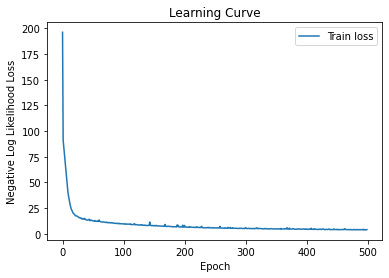

In [27]:
plt.plot(nn_regr.avg_trn_loss_tracker, label='Train loss')
plt.title("Learning Curve")
plt.ylabel("Negative Log Likelihood Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [28]:
y_hat_trn =  nn_regr.predict(X_trn)

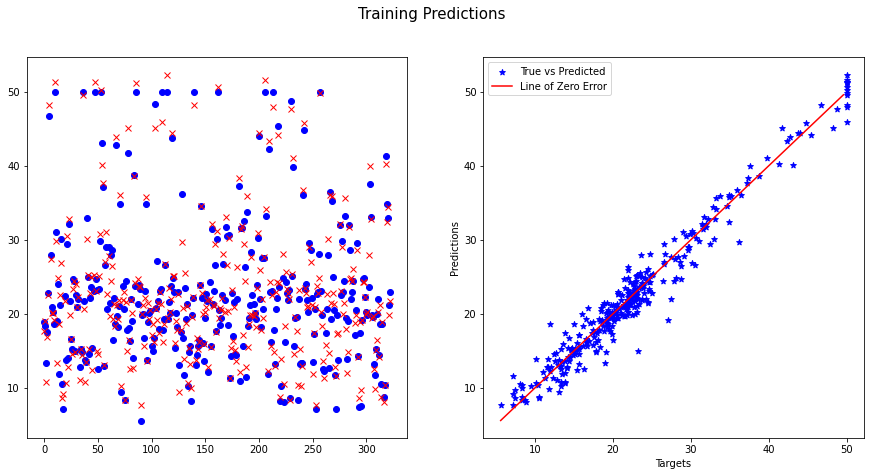

Training SSE: 1179.7261696769158
Training MSE: 3.6524030020957143
Training RMSE: 1.9111261083705895


In [29]:
sse_trn, mse_trn, rmse_trn = analyze(y_trn, y_hat_trn, title='Training Predictions', dataset='Training')

## Validating

#### TODO 2 (6 points total)
Now, make predictions for the **validation** set and analyze the results. To do so, use the utility functions, metrics, plots provided for you. If you get stuck, review old labs as all these functions have been used before.

**Coding (2 points): To receive <u>full points</u> you must have the following:**

1. Using the **validation** data, compute the predictions.
2. Using the **validation** data, plot the validation predictions vs the targets using the `analyze()` function. Additionally, the `analyze()` function will provide you with the final SSE, MSE, and RMSE scores for the validation data.

**Written (4 points)** 

3. (4-5 sentences) Based on your validation/validation results and visualizations, describe how good or bad your neural network regressor is performing. To do so, cite the MSE and RMSE scores and describe why EACH of the plots, including the learning curve plot, back up your claim. 

In [30]:
# add validation analysis below (create more code cells as needed)

In [31]:
y_hat_vld =  nn_regr.predict(X_vld)

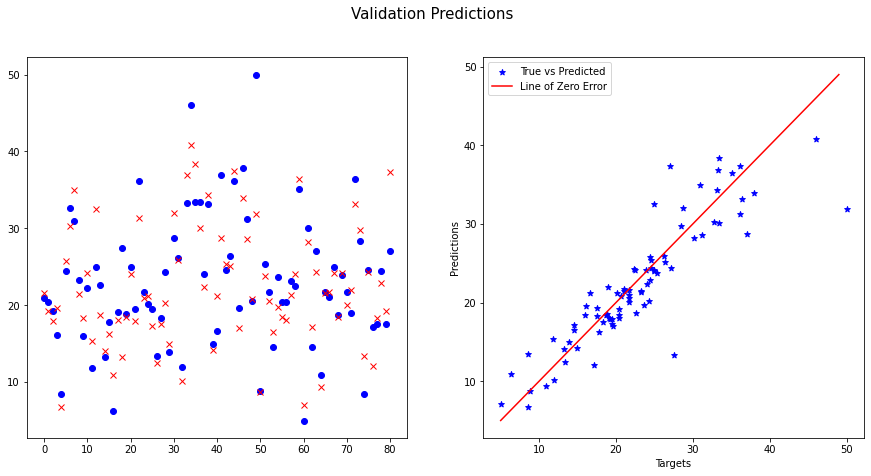

Validation SSE: 1219.9471476355234
Validation MSE: 15.061075896734856
Validation RMSE: 3.8808602006172364


In [32]:
sse_vld, mse_vld, rmse_vld = analyze(y_vld, y_hat_vld, title='Validation Predictions', dataset='Validation')


    TODO 2 -  Add written response below
    --------------------------------------
1.  The training MSE hovers around 3.92 while the validation MSE stays around 14.9. Based on all the different hyperparameters I used, these results are pretty good. The learning curve shows that using ~25 epochs would be optimal, but I used 500 anyway to produce the best results possible.

## Hyper-parameter Search

Optionally, if you want to find your optimal hyper-parameters without manually tuning each parameter individually you can use Sklearn's `GridSearchCV`. The below code sets you up to utilize the `GridSearchCV` class. 

#### (OPTIONAL) TODO
Finish the hyper-parameter search code by creating an instance of the `GridSearchCV` class and then calling `fit()` method and passing the **training** data.

**WARNING: Grid searches can take a really long time to run. Be very conservative with the number of hyper-parameters you search over the number of folds you declare.**

1. Create an instance of the `GridSearchCV` which takes as input the `search_model_kwargs`, `search_nn_regr`, `search_mse_scoring`. Here you can define the `search_model_kwargs` by setting the keys in `search_model_kwargs` dictionary located in the `HyperParametersAndTransforms.NeuralNetworkRegression` sub-class. Store the output into `gscv_regr`.

2. Call the `fit()` method and pass the training data.

3. Uncomment the marked below lines to print results using a Pandas DataFrame. 

In [33]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from itcs4156.util.metrics import mse

In [34]:
# Load NeuralNetworkRegressor model kwargs for hyper-parameter searching
search_model_kwargs = hpt.NeuralNetworkRegressor.search_model_kwargs
search_model_kwargs

{'neurons_per_layer': [[]],
 'learning_curve_loss': [<function itcs4156.util.metrics.sse(y, y_hat)>],
 'delta_loss_func': [None],
 'g_hidden': [None],
 'g_output': [None],
 'alpha': [None],
 'epochs': [1],
 'batch_size': [32],
 'verbose': [False],
 'seed': [None]}

In [35]:
# Load hyper-parameters to use for gridsearch
search_model_kwargs = hpt.NeuralNetworkRegressor.search_model_kwargs

# Initialize temporay NeuralNetworkRegressor
search_nn_regr = NeuralNetworkRegressor(**search_model_kwargs)

# Initialize sklearn Scorer class
search_mse_scoring = make_scorer(mse, greater_is_better=False)

# TODO (OPTIONAL) Add code below for initializing/running GridSearchCV
gscv_regr = GridSearchCV

The below DataFrame can be used to summarize the results for your hyper-parameter search. The rows are shorted in ascending order from smallest loss to highest loss.

In [36]:
# TODO (OPTIONAL) Uncomment below lines
# search_results_regr = format_results(gscv_regr.cv_results_)
# search_results_regr

# Neural Network Classification


## MNIST Handwritten Digit Prediction

<img src="https://camo.githubusercontent.com/01c057a753e92a9bc70b8c45d62b295431851c09cffadf53106fc0aea7e2843f/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067" width=300 height=300>


The dataset you'll be using for this project is the famous [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset which contains images of handwritten digits 0 through 9. There are 60,000 images included in the dataset and each image is a gray scale image of size 28x28. Each pixel represents a feature which means there are $28*28$ or $784$ features per each data sample.
The goal of the dataset is to classify each image of handwritten digits correctly!

The dataset consists of 3 splits:

1. **Train**: Throughout this assignment you will be training your model using this data. There are approximately 44k training samples.
2. **Validation**: You will then use this set to tune your model and evaluate its performance. There are approximately 12k training samples.
3. **Test**: This split simulates real life data which we often don't have access to until the model is deployed. We have kept this split hidden from you and we will use it to judge the performance of your model on Autolab.

We will download the training and validation splits shortly. The test split will remain hidden from you and Autolab will use it compute your final grade. Even though this dataset is public, you will have a different version of training and validation splits that are curated for this assignment. The training and validation splits are downloaded automatically and the testing split is kept secret for evaluation done on Autolab.

### Downloading the data
First, let's download the training and validation dataset to your machine. To do so, we'll need the `MNISTDataset` class from our module which is located at `itcs4156.datasets.MNISTDataset` or in the `itcs4156/datasets/MNISTDataset.py` file.

The below code loads the data by instantiating the `MNISTDataset` class. If you already have the data downloaded then the download will be skipped.

In [37]:
from itcs4156.datasets.MNISTDataset import MNISTDataset
mnist_dataset = MNISTDataset()

Skipping download. File already exists: /Users/jarenrobbins/Documents/UNCC/Spring-2022/ITCS-4156/Mini-projects/mini-projects/itcs4156/datasets/data/MNIST/train.zip

Unzipping: /Users/jarenrobbins/Documents/UNCC/Spring-2022/ITCS-4156/Mini-projects/mini-projects/itcs4156/datasets/data/MNIST/train.zip

Skipping download. File already exists: /Users/jarenrobbins/Documents/UNCC/Spring-2022/ITCS-4156/Mini-projects/mini-projects/itcs4156/datasets/data/MNIST/val.zip

Unzipping: /Users/jarenrobbins/Documents/UNCC/Spring-2022/ITCS-4156/Mini-projects/mini-projects/itcs4156/datasets/data/MNIST/val.zip



Below we load the train and validation features and targets using the `load()` method. Notice, the features and targets are contained in the **separate** DataFrame.

In [38]:
# This can take a few seconds as the MNIST dataset is rather large!
X_trn_df, y_trn_df, X_vld_df, y_vld_df = mnist_dataset.load()
print(f"X_trn_df type: {type(X_trn_df)}")
print(f"y_trn_df type: {type(y_trn_df)}")
print(f"X_vld_df type: {type(X_vld_df)}")
print(f"y_vld_df type: {type(y_vld_df)}")

Loading dataset with Pandas...
Done!
X_trn_df type: <class 'pandas.core.frame.DataFrame'>
y_trn_df type: <class 'pandas.core.frame.DataFrame'>
X_vld_df type: <class 'pandas.core.frame.DataFrame'>
y_vld_df type: <class 'pandas.core.frame.DataFrame'>


Below are print statements to help you understand how the data is setup. Since we are working with images the data comes as a 2D array instead a 3D array of shape (data samples, width, height). This means our data will have the shape (data samples, features) where the number of features are equal to the width multiplied by the height (i.e., the number of pixels)!

Pay attention to the number of data samples, features, and classes the training and validation splits have. Also, pay attention to the number of data samples per class. Notice they are relatively equal!

In [39]:
print(f"Shape of training data X_trn_df: {X_trn_df.shape}")
print(f"Shape of training labels y_trn_df: {y_trn_df.shape}")

print(f"Shape of validation data X_vld_df: {X_vld_df.shape}")
print(f"Shape of validation labels y_vld_df: {y_vld_df.shape}")

class_labels, trn_class_counts = np.unique(y_trn_df['class'], return_counts=True)
_, vld_class_counts = np.unique(y_vld_df['class'], return_counts=True)
print(f"\nUnique class labels:\n\t{class_labels}")
print(f"Training labels unique class label counts:\n\t{trn_class_counts}")
print(f"Validation labels unique class label counts:\n\t{vld_class_counts}")

Shape of training data X_trn_df: (44800, 784)
Shape of training labels y_trn_df: (44800, 1)
Shape of validation data X_vld_df: (11200, 784)
Shape of validation labels y_vld_df: (11200, 1)

Unique class labels:
	[0 1 2 3 4 5 6 7 8 9]
Training labels unique class label counts:
	[4434 5003 4504 4564 4425 4001 4384 4641 4378 4466]
Validation labels unique class label counts:
	[1126 1274 1106 1144 1104 1039 1096 1149 1090 1072]


## Data Visualization

Below, we display some random samples from each of the 9 classes using the `display_classes()` function. Remember, MNIST contains handwritten digits for the digits 0 through 9. Recall that the data samples have 784 features. Recall the the image dimensions are 28x28 which means we need to reshape the 784 features/pixels back into the shape 28x28 in order to properly visualize the data sample.

In [40]:
def display_classes(
    images: np.ndarray, 
    labels:np.ndarray,
    shape: tuple=(28,28),
    n_samples=5):
    """ Displays random samples from MNIST classes 
        
        Args:
            images: A NumPy array where each row is a data sample and
                each column corresponds to a pixel location.
                
            labels: A NumPy array where each row corresponds to an
                image label.
                
            shape: 2D Shape of the images. By default each data sample in images 
                should be a flattened array.
                
            n_samples: Number of samples to display 
                
    """
    # Get the unique class labels
    class_labels = np.unique(labels)
    # Compute the total number of images to plot
    plot_n_images = len(class_labels) * n_samples
    
    n_cols = n_samples
    # Compute the number of rows and round up
    n_rows = math.ceil(plot_n_images / n_cols)
    # Define subplot 
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*4))
    # Plot images
    for i, label in enumerate(class_labels):
        # Find all class locations
        all_class_locs = np.where(labels==label)[0]
        # Randomly choose class data samples
        selected_class_locs = np.random.choice(all_class_locs, n_samples, replace=False)
        # Plot label/name per row
        axs[i, 0].set_ylabel(f"Class: {label}", size='large')
        
        for j, cls_loc in enumerate(selected_class_locs):
            # Reshape image into width x height
            img = images[cls_loc].reshape(shape)
            # Plot image
            axs[i,j].imshow(img, cmap=plt.cm.gray)
            # Disable x and y ticks
            axs[i,j].set_xticks([])
            axs[i,j].set_yticks([])

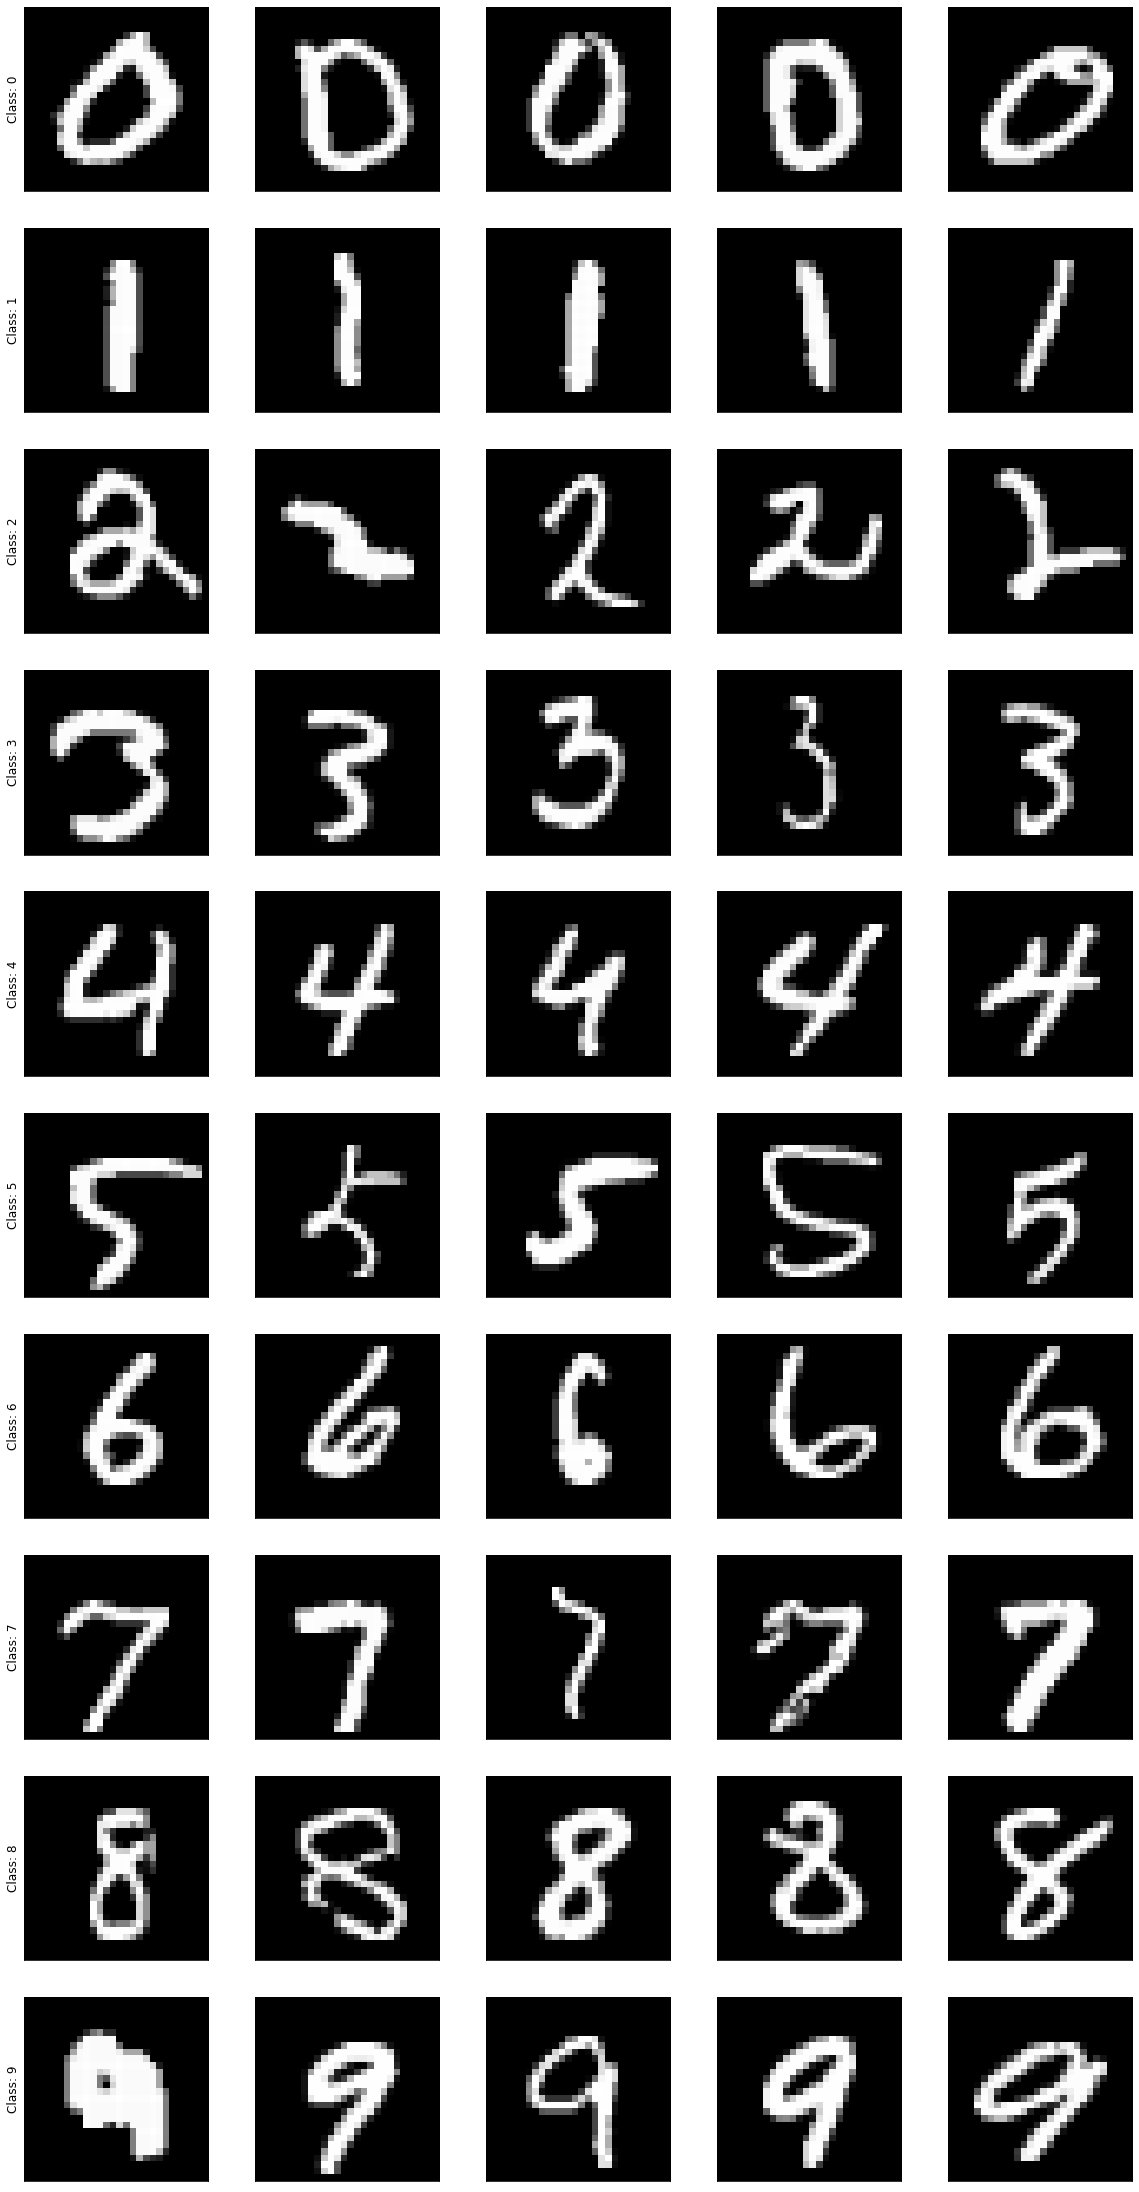

In [41]:
display_classes(X_trn_df.values, y_trn_df.values, shape=(28,28))

## Utility Functions, Plots, and Metrics

This section defines helper functions to visualize and evaluate our performance. Feel free to read through them.

### Confusion matrix

Below is the confusion matrix plotted using Seaborn. This is the same confusion matrix function we have been using in the labs.

In [42]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y, y_hat, class_names=None, figsize=(6, 4)):
    # Convert y from one-hot encoding back to normal
    if len(y.shape) > 1 and y.shape[-1] > 1:
        y = np.argmax(y, axis=1).reshape(-1,1)

    cfm = confusion_matrix(y_true=y, y_pred=y_hat)

    labels = np.sort(np.unique(y))
    if class_names is not None:
        classes = []
        for l in labels:
            class_name = class_names.get(l, l)
            classes.append(class_name)
        labels = classes

    columns, index = labels, labels
    cfm_df = pd.DataFrame(cfm, index=index, columns=columns)
    fig, ax = plt.subplots(figsize=figsize)  
    sns.heatmap(cfm_df, annot=True, fmt='d', cmap='Blues', ax=ax)
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Acutal', fontsize=14)
    return cfm

### Metrics

Below we import the accuracy metric for computing the accuracy of the predictions.

In [43]:
from itcs4156.util.metrics import accuracy
print(inspect.getsource(accuracy))

def accuracy(y, y_hat):
    # Convert y from one-hot encoding back to normal
    if len(y.shape) > 1 and y.shape[-1] > 1:
        y = np.argmax(y, axis=1).reshape(-1,1)
    # Reshape labels and preds to be 2D arrays
    elif len(y.shape) == 1:
        y = y.reshape(-1, 1)
    if len(y_hat.shape) == 1:
        y_hat = y_hat.reshape(-1, 1)
    
    return accuracy_score(y, y_hat)



Below is the function for computing and nicely displaying the  PPV, TPR, and TNR scores per class. We have also seen this function throughout the labs, although it has been slightly updated her

In [44]:
from itcs4156.util.metrics import compute_scores
print(inspect.getsource(compute_scores))

def compute_scores(y, y_hat, class_names=None):
    def print_scores(tn, fn, fp, tp):

        print(f"\tPPV ratio tp/(tp+fp): {tp}/{tp+fp}")
        print(f"\tPPV (precision): {ppv(tp=tp, fp=fp) }\n")

        print(f"\tTPR ratio tp/(tp+fn): {tp}/{tp+fn}")
        print(f"\tTPR (recall/sensitivity): {tpr(tp=tp, fn=fn)}\n")

        print(f"\tTNR ratio tn/(tn+fp): {tn}/{tn+fp}")
        print(f"\tTNR (specificity): {tnr(tn=tn, fp=fp)}")
    
    if class_names is None:
        class_names = {}
    
    # Convert y from one-hot encoding back to normal
    if len(y.shape) > 1 and y.shape[-1] > 1:
        y = np.argmax(y, axis=1).reshape(-1,1)
    
    cm = confusion_matrix(y_true=y, y_pred=y_hat)
    
    # Computing multi-class classification tp, fn, tp, tn
    fp = cm.sum(axis=0) - np.diag(cm)  
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    
    ppv_ = ppv(tp=tp, fp=fp) 
    tpr_ = tpr(tp=tp, fn=fn)
    tnr_ = tnr(tn=tn, fp=fp)
    
 

## Data Preparation

Before implementing and training the `NeuralNetworkClassifier` class we first need to define the data preprocessing steps. This section will utilize the `MNISTDataPreparation` class which inherits from the `DataPreparation` class.  

The `MNISTDataPreparation.data_prep()` method  will preprocess the MNIST dataset by calling your `target_pipe` and `feature_pipe` Sklearn `Pipeline` instances.

#### Autolab TODO 3

Within the `HyperParametersAndTransforms.NeuralNetworkClassifier` class, set the `feature_pipe` and `target_pipe` keys to store instances of Sklearn's `Pipeline`. You have access to the following data cleaning/transformation classes which are imported for you within the `train.py` file: 

- `AddBias` 
- `Standardization`
- `ImageNormalization`
- `OneHotEncoding`

Choose the classes YOU think need to be applied in order to prepare the Boston Housing data for the neural network regression algorithm. If needed, feel free to define your own classes within the `HyperParametersAndTransforms.py` file as well.

1. (REQUIRED) Set the `feature_pipe` key to an instance of Sklearn's `Pipeline`. Pass a list of tuples which define the data cleaning and transformation steps you wish to apply to the features.

1. (REQUIRED)  Set the `target_pipe` key to an instance of Sklearn's `Pipeline`. Recall,  Sklearn's `Pipeline` takes list of tuples where each tuple defines a new data preprocessing steps you wish to apply to the targets.

Once you defined the `Pipeline` class instance you can test the `feature_pipe` and `target_pipe` preprocessing steps by running the below code which calls the `data_prep()` method for an `MNISTDataPreparation` class instance. Additionally, the below code will load the data for this section.

In [45]:
# Load NeuralNetworkClassifier data prep kwargs
data_prep_kwargs = hpt.NeuralNetworkClassifier.data_prep_kwargs
data_prep_kwargs

{'target_pipe': Pipeline(steps=[('one-hot', OneHotEncoding())]),
 'feature_pipe': Pipeline(steps=[('standard', Standardization())])}

In [46]:
# Initialize MNISTDataPreparation class instance
mnist_data_prep = MNISTDataPreparation(**data_prep_kwargs)

# Apply data preprocessing and store returned data
X_trn, y_trn, X_vld, y_vld =  mnist_data_prep.data_prep(return_array=True)

print(f"Shape of training data X_trn: {X_trn.shape}")
print(f"Shape of training labels y_trn: {y_trn.shape}")

print(f"Shape of validation data X_vld: {X_vld.shape}")
print(f"Shape of validation labels y_vld: {y_vld.shape}")

class_labels, trn_class_counts = np.unique(np.argmax(y_trn, axis=1), return_counts=True)
_, vld_class_counts = np.unique(np.argmax(y_vld, axis=1), return_counts=True)
print(f"\nUnique class labels:\n\t{class_labels}")
print(f"Training labels unique class label counts:\n\t{trn_class_counts}")
print(f"Validation labels unique class label counts:\n\t{vld_class_counts}")

print(f"\nTraining data value range:\n\tmin:{np.min(X_trn)} max:{np.max(X_trn)}")
print(f"Validation data value range:\n\tmin:{np.min(X_vld)} max:{np.max(X_vld)}")

Skipping download. File already exists: /Users/jarenrobbins/Documents/UNCC/Spring-2022/ITCS-4156/Mini-projects/mini-projects/itcs4156/datasets/data/MNIST/train.zip

Unzipping: /Users/jarenrobbins/Documents/UNCC/Spring-2022/ITCS-4156/Mini-projects/mini-projects/itcs4156/datasets/data/MNIST/train.zip

Skipping download. File already exists: /Users/jarenrobbins/Documents/UNCC/Spring-2022/ITCS-4156/Mini-projects/mini-projects/itcs4156/datasets/data/MNIST/val.zip

Unzipping: /Users/jarenrobbins/Documents/UNCC/Spring-2022/ITCS-4156/Mini-projects/mini-projects/itcs4156/datasets/data/MNIST/val.zip

Loading dataset with Pandas...
Done!
Returning data as NumPy array...
Shape of training data X_trn: (44800, 784)
Shape of training labels y_trn: (44800, 10)
Shape of validation data X_vld: (11200, 784)
Shape of validation labels y_vld: (11200, 10)

Unique class labels:
	[0 1 2 3 4 5 6 7 8 9]
Training labels unique class label counts:
	[4434 5003 4504 4564 4425 4001 4384 4641 4378 4466]
Validation la

## Training

#### Autolab TODO 4
Finish the implementing the `NeuralNetworkClassifier` class. Additionally, set the hyper-parameters for the `NeuralNetworkClassifier` by using setting the corresponding keys contained inside the `model_kwargs` dictionary. The `model_kwargs` dictionary is contained within the `HyperParametersAndTransforms.NeuralNetworkClassifier` sub-class.


**`NeuralNetworkClassifier`**

1. Finish implementing the `NeuralNetworkClassifier` class located in the `itcs4156/assignments/neural_networks/NeuralNetworkClassifier.py` file. To complete implementation, you will need to implement the following methods: `predict()`.
    1. Notice that the `NeuralNetworkClassifier` class inherits from the `NeuralNetwork`class. This means you only need to implement the `predict()` method as it is specific to making predictions for multi-class classification problems.


3. Set the hyper-parameters that correspond to the keys contained within the `model_kwargs` dictionary. The `model_kwargs` dictionary is contained inside the  `HyperParametersAndTransforms.NeuralNetworkClassifier` sub-class. Recall, the `HyperParametersAndTransforms.NeuralNetworkClassifier` sub-class is located within the `itcs4156/assignments/neural_networks/train.py` file.
    1. You will need to complete the `delta_softmax_nll` function contained within `itcs4156/assignments/neural_networks/train.py` file. This function should return the derivative for the negative log likelihood (NLL) loss. A reference to the`delta_softmax_nll` function should be passed to the `delta_loss_func` key.
    2. You need to implement any of the activation function class implementations contained within the  `itcs4156/assignments/neural_networks/train.py` file that YOU think are required or want to try with the `NeuralNetworkClassifier` class. References to the activation function classes should be passed to the `g_hidden` and `g_output` keys.

In [47]:
from itcs4156.assignments.neural_networks.NeuralNetworkClassifier import NeuralNetworkClassifier

In [48]:
# Load NeuralNetworkRegressor model kwargs
model_kwargs = hpt.NeuralNetworkClassifier.model_kwargs
model_kwargs

{'neurons_per_layer': [30, 10],
 'learning_curve_loss': <function itcs4156.util.metrics.nll(y, pred_probs, epsilon=1e-05)>,
 'delta_loss_func': <function itcs4156.assignments.neural_networks.train.delta_softmax_nll(y, y_hat)>,
 'g_hidden': itcs4156.assignments.neural_networks.train.ReLU,
 'g_output': itcs4156.assignments.neural_networks.train.Softmax,
 'alpha': 0.01,
 'epochs': 10,
 'batch_size': 64,
 'verbose': False,
 'seed': None}

In [49]:
# Load NeuralNetworkClassifier model kwargs
model_kwargs = hpt.NeuralNetworkClassifier.model_kwargs

# Initialize NeuralNetworkClassifier
nn_clf = NeuralNetworkClassifier(**model_kwargs)

# Train NeuralNetworkClassifier
nn_clf.fit(X_trn, y_trn, X_vld=X_vld, y_vld=y_vld)

#### TODO 3 (4 points total)
Now, make predictions for the **training** set and analyze the results. To do so, use the utility functions, metrics, plots provided for you. If you get stuck, review old labs as all these functions have been used before.

**Coding (4 points): To receive <u>full points</u> you must have the following:**

1. Plot a learning curve for both the training and validation average NLL loss which were captured during learning. Recall, the class variables `avg_trn_loss_tracker` and `avg_vld_loss_tracker` store the average loss for a given epoch using the training and validation data.
1. Using the **training** data, compute the predictions.
1. Using the **training** data, compute the accuracy.
1. Using the **training** data, plot the confusion matrix.
1. Using the **training** data, compute the PPV, TPR, TNR scores with respect to each class.

In [50]:
 # add training analysis below (create more code cells as needed)

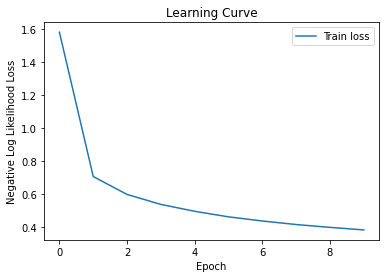

In [51]:
plt.plot(nn_clf.avg_trn_loss_tracker, label='Train loss')
plt.title("Learning Curve")
plt.ylabel("Negative Log Likelihood Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [52]:
y_hat_trn =  nn_clf.predict(X_trn)

In [53]:
accuracy(y_trn, y_hat_trn)

0.8925

array([[4215,    0,   20,   23,    8,   60,   49,   10,   32,   17],
       [   1, 4832,   46,    7,    7,   20,    7,   17,   51,   15],
       [  64,   46, 3897,  110,   59,   17,  101,   76,  101,   33],
       [  20,   25,  146, 3885,    8,  201,   18,   83,  131,   47],
       [  17,   20,   26,    2, 4061,    6,   66,   19,   29,  179],
       [  90,   27,   26,  162,   81, 3291,  109,   20,  139,   56],
       [  39,   17,   40,    4,   67,   58, 4125,    6,   27,    1],
       [  20,   50,   72,   37,   54,    9,    2, 4183,   26,  188],
       [  45,  128,   59,  156,   58,  155,   37,   49, 3624,   67],
       [  35,   17,   12,   57,  217,   29,    9,  175,   44, 3871]])

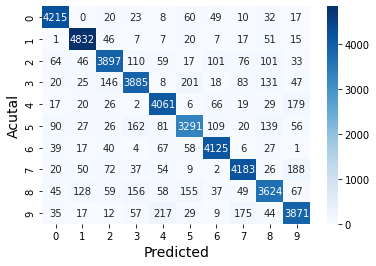

In [54]:
plot_confusion_matrix(y_trn, y_hat_trn)

In [55]:
compute_scores(y_trn, y_hat_trn)

Scores for class 0
	PPV ratio tp/(tp+fp): 4215/4546
	PPV (precision): 0.9271887373515179

	TPR ratio tp/(tp+fn): 4215/4434
	TPR (recall/sensitivity): 0.9506089309878214

	TNR ratio tn/(tn+fp): 40035/40366
	TNR (specificity): 0.9918000297279889
Scores for class 1
	PPV ratio tp/(tp+fp): 4832/5162
	PPV (precision): 0.9360712901975978

	TPR ratio tp/(tp+fn): 4832/5003
	TPR (recall/sensitivity): 0.9658205076953827

	TNR ratio tn/(tn+fp): 39467/39797
	TNR (specificity): 0.9917079176822373
Scores for class 2
	PPV ratio tp/(tp+fp): 3897/4344
	PPV (precision): 0.8970994475138122

	TPR ratio tp/(tp+fn): 3897/4504
	TPR (recall/sensitivity): 0.8652309058614565

	TNR ratio tn/(tn+fp): 39849/40296
	TNR (specificity): 0.9889070875521143
Scores for class 3
	PPV ratio tp/(tp+fp): 3885/4443
	PPV (precision): 0.8744091829844699

	TPR ratio tp/(tp+fn): 3885/4564
	TPR (recall/sensitivity): 0.8512269938650306

	TNR ratio tn/(tn+fp): 39678/40236
	TNR (specificity): 0.9861318222487325
Scores for class 4
	PPV 

## Validating

#### TODO 4  (6 points total)
Now, make predictions for the **validation** set and analyze the results. To do so, use the utility functions, metrics, plot provided for you. If you get stuck, review old labs as all these functions have been used before.

**Coding (2 points): To receive <u>full points</u> you must have the following:**

1. Using the **validation** data, compute the predictions.
2. Using the **validation** data, compute the accuracy.
3. Using the **validation** data, plot the confusion matrix.
4. Using the **validation** data, compute the PPV, TPR, TNR scores with respect to each class.

**Written (4 points)** 

5. (4-5 sentences) Based on your validation/validation results and visualizations, describe how good or bad your neural network classifier is performing. To do so, cite the accuracy and other metrics such as PPV, TPR, and TNR. Further, describe whether or not the learning curve and confusion matrix backup your claims. 

In [56]:
# add validation analysis below (create more code cells as needed)

In [57]:
y_hat_vld =  nn_clf.predict(X_vld)

In [58]:
accuracy(y_vld, y_hat_vld)

0.8826785714285714

array([[1063,    0,    6,    5,    3,   27,    4,    5,    9,    4],
       [   0, 1235,    9,    2,    0,    1,    6,    4,   16,    1],
       [  22,   16,  923,   28,   13,    6,   29,   29,   30,   10],
       [   8,    9,   21,  985,    0,   59,    5,   20,   27,   10],
       [   5,    4,    7,    0,  997,    2,   17,    5,    8,   59],
       [  23,   12,    6,   33,   14,  862,   36,    7,   31,   15],
       [  25,    7,   13,    1,   14,   20, 1003,    0,   12,    1],
       [   6,   10,   18,    9,   21,    9,    1, 1030,    4,   41],
       [   6,   37,   18,   47,   12,   48,   12,   13,  867,   30],
       [  22,    1,    1,   16,   42,    5,    1,   48,   15,  921]])

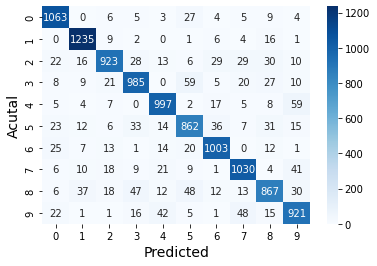

In [59]:
plot_confusion_matrix(y_vld, y_hat_vld)

In [60]:
compute_scores(y_vld, y_hat_vld)

Scores for class 0
	PPV ratio tp/(tp+fp): 1063/1180
	PPV (precision): 0.9008474576271186

	TPR ratio tp/(tp+fn): 1063/1126
	TPR (recall/sensitivity): 0.9440497335701599

	TNR ratio tn/(tn+fp): 9957/10074
	TNR (specificity): 0.9883859440142942
Scores for class 1
	PPV ratio tp/(tp+fp): 1235/1331
	PPV (precision): 0.9278737791134485

	TPR ratio tp/(tp+fn): 1235/1274
	TPR (recall/sensitivity): 0.9693877551020408

	TNR ratio tn/(tn+fp): 9830/9926
	TNR (specificity): 0.9903284303848479
Scores for class 2
	PPV ratio tp/(tp+fp): 923/1022
	PPV (precision): 0.9031311154598826

	TPR ratio tp/(tp+fn): 923/1106
	TPR (recall/sensitivity): 0.8345388788426763

	TNR ratio tn/(tn+fp): 9995/10094
	TNR (specificity): 0.9901921933822072
Scores for class 3
	PPV ratio tp/(tp+fp): 985/1126
	PPV (precision): 0.8747779751332149

	TPR ratio tp/(tp+fn): 985/1144
	TPR (recall/sensitivity): 0.861013986013986

	TNR ratio tn/(tn+fp): 9915/10056
	TNR (specificity): 0.9859785202863962
Scores for class 4
	PPV ratio tp/(

    TODO4 -  Add written response below
    --------------------------------------

1. My neural network classifier is working well. The accuracy is consistently around 90%, and the other scores are even across the board, meaning the network isn't doing something like mispredicting a single value.

## Hyper-parameter Search

Optionally, if you want to find your optimal hyper-parameters without manually tuning each parameter individually you can use Sklearn's `GridSearchCV`. The below code sets you up to utilize the `GridSearchCV` class. 

#### (OPTIONAL) TODO
Finish the hyper-parameter search code by creating an instance of the `GridSearchCV` class and then calling `fit()` method and passing the **training** data.

**WARNING: Grid searches can take a really long time to run. Be very conservative with the number of hyper-parameters you search over and the number of folds you declare.**

1. Create an instance of the `GridSearchCV` which takes as input the `search_model_kwargs`, `search_nn_clf`, `search_mean_nll_scoring`. Here you can define the `search_model_kwargs` by setting the keys in `search_model_kwargs` dictionary located in the `HyperParametersAndTransforms.NeuralNetworkClassifier` sub-class.


2. Call the `fit()` method and pass the training data.

3. Uncomment the marked below lines to print results using a Pandas DataFrame. 

In [61]:
from itcs4156.util.metrics import mean_nll

In [62]:
# Load NeuralNetworkClassifier model kwargs for hyper-parameter searching
search_model_kwargs = hpt.NeuralNetworkClassifier.search_model_kwargs
search_model_kwargs

{'neurons_per_layer': [[]],
 'learning_curve_loss': [<function itcs4156.util.metrics.nll(y, pred_probs, epsilon=1e-05)>],
 'delta_loss_func': [None],
 'g_hidden': [None],
 'g_output': [None],
 'alpha': [None],
 'epochs': [1],
 'batch_size': [32],
 'verbose': [False],
 'seed': [None]}

In [63]:
# Load hyper-parameters to use for gridsearch
search_model_kwargs = hpt.NeuralNetworkClassifier.search_model_kwargs

# Initalize placeholder neural network classifier instance
search_nn_clf = NeuralNetworkClassifier(**search_model_kwargs)

# Initialize sklearn Scorer class
search_mean_nll_scoring = make_scorer(mean_nll, needs_proba=True, greater_is_better=False)

# TODO (OPTIONAL) Add code below for initializing/running GridSearchCV
gscv_clf = GridSearchCV

The below DataFrame can be used to summarize the results for your hyper-parameter search. The rows are shorted in ascending order from smallest loss to highest loss.

In [64]:
# TODO (OPTIONAL) Uncomment below lines
# search_results_clf = format_results(gscv_clf.cv_results_)
# search_results_clf

# Putting it all together!

Once you have finished all the above four **TODOs** and you are satisfied with the results you are getting, it is time evaluate all your code together and make it ready for submission to Autolab.

Before running the `run_eval()` function below, make sure you have filled out all the required hyper-parameters and data cleaning/transformations in the `HyperParametersAndTransforms` class contained within `itcs4156/assignments/neural_networks/train.py` script class. You should have already done this!

**MAKE SURE THEY ARE SET BEFORE RUNNING `run_eval()` LOCALLY AND BEFORE SUBMITTING TO AUTOLAB!** 


## Final Testing
To quickly evaluate the performance of all your algorithms at once, you can use the `run_eval()` function below. Locally, each algorithm will be trained and assessed on the validation dataset (like we do individually in the above TODOs). The `run_eval()` function will give you an APPROXIMATE estimate of the points you might receive before submitting to Autolab. 

On Autolab, the same  `run_eval()` function will be ran but it will now use the hidden test dataset such that each algorithm will be trained and assessed on the test dataset. Points will be awarded per algorithm based on the test MSE. The total Autolab grade is then assessed by summing the total number of points received where the max points you can receive is 80.

If a given test fails when running `run_eval()` the error will be printed for the corresponding algorithm/class. You can view any errors on Autolab by clicking on the submission and viewing the log (log should look like the output given below by `run_eval()`). 

For this assignment when you submit to Autolab you will only have **10 minutes for <u>ALL</u> your algorithms to be trained and tested**. If you exceed this time then Autolab will kill your job. You can see the elapsed time in the bottom of the `run_eval()` output locally and in Autolab.

Your Autolab ranking will be computed based on the following:
- total points earned
- regression test MSE
- classification test accuracy 

####  Autolab TODO 7

Before running the `run_eval()` function below, make sure you have set all the hyper-parameters for the algorithms by setting them in the `train.py` file in the `itcs4156/assignments/neural_networks` directory 

These parameters will be used in by `run_eval()`function which will locally test your code. Further, these parameters will be used by Autolab to evaluate your algorithm performance when using an unseen test set. **MAKE SURE THEY ARE SET BEFORE RUNNING `run_eval()` LOCALLY AND BEFORE SUBMITTING TO AUTOLAB!** 

In [65]:
from itcs4156.assignments.neural_networks.evaluate import run_eval
run_eval();

Building model NeuralNetworkRegressor
Returning data as NumPy array...
Attempting to use the following features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Skipping download. File already exists: /Users/jarenrobbins/Documents/UNCC/Spring-2022/ITCS-4156/Mini-projects/mini-projects/itcs4156/datasets/data/housing.train

Skipping download. File already exists: /Users/jarenrobbins/Documents/UNCC/Spring-2022/ITCS-4156/Mini-projects/mini-projects/itcs4156/datasets/data/housing.val

Skipping download. File already exists: /Users/jarenrobbins/Documents/UNCC/Spring-2022/ITCS-4156/Mini-projects/mini-projects/itcs4156/datasets/data/housing.names

Training NeuralNetworkRegressor...
	Using hyperparameters: 
		neurons_per_layer = [50, 50, 1]
		learning_curve_loss = sse
		delta_loss_func = delta_mse
		g_hidden = Sigmoid
		g_output = Linear
		alpha = 0.01
		epochs = 500
		batch_size = 32
		verbose = False
		seed = None
		Train mse: 3.506
Evaluating